In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Finding Nemo

In [2]:
nemo = cv2.imread("../opencv-np-workshop/data/img/nemo.jpg")
world = cv2.imread("../opencv-np-workshop/data/img/nemo-sea2.jpg")

In [3]:
nemo.shape

(341, 520, 3)

In [4]:
detector=cv2.ORB_create(nfeatures=30) #nfeatures=500 by default

In [5]:
kp_nemo, des_nemo = detector.detectAndCompute(nemo, mask = None)
kp_world, des_world = detector.detectAndCompute(world, mask = None)

In [6]:
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING2)

In [7]:
matches = matcher.match(des_world, des_nemo)

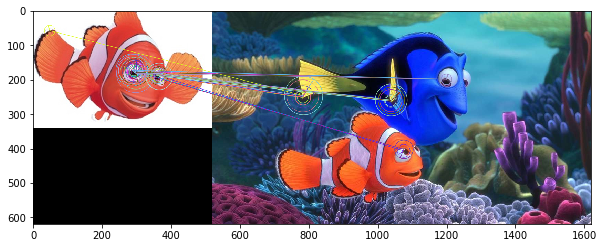

In [8]:
out = cv2.drawMatches(nemo, kp_nemo, world, kp_world, 
                                    matches, None, #output image
                                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS | 
                                    cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,10))
plt.imshow(out[:,:,::-1])

In [16]:
vid = cv2.VideoCapture("../opencv-np-workshop/data/video/Findet Nemo - Trailer.mp4")

In [17]:
while True:
    _, frame = vid.read()
    kp_frame, des_frame = detector.detectAndCompute(world, mask = None)
    matches = matcher.match(des_frame, des_nemo)
    frame = cv2.drawMatches(nemo, kp_nemo, frame, kp_frame, matches, None)
    cv2.imshow("Nemo finder", frame)

    if cv2.waitKey(300) == 27:
        break
vid.release()
cv2.destroyWindow("Nemo finder")

## Brute-force matching

In [39]:
bf_matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING2, True)
video_keypoints(bf_matcher)

## FLANN based matcher

In [8]:
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=20, key_size=15, multi_probe_level=2)
search_params = dict(checks=10)

flann_kd_matcher = cv2.FlannBasedMatcher(index_params, search_params)